# TEsting the conductivity of Duch soils (De Straringreeks) in Heinen, Bakker and Wösten (2018)

The properties of Dutch soils have been published by

Heinen M., G.Bakker and J.H.M.Wösten (2020) Waterretentie- en doorlatendheidskarakteristieken van boven- en ondergronden in Nederland: de Staringreeks; Update 2018. Wageningen, Wageningen Environmental Research, Rapport 2978, 78 blz.; 6 fig.; 4 tab.; 22 ref. ISSN 1566-7197.

The tables with the soil data are imported and allow compuation of suction, moisture and hydraulic conductivity relations for the most important Dutch soils, the so-called Staringreeks. The Staring Series defines 18 upper soils and 18 lower soils.

# Problem

The conductivty does not behave well in the sense that it's monotonic with saturation. Due ot thos interpolation of saturation given the conductivity fails because to obtain unique answers, the x-values most be monotonic.

The problem des not arise with the Van Genughten relations, which lack a value of $\lambda$, which is used by HBW.

In this nootebook we research the behavior of K(S)

@TO Aug. 2026

In [2]:
import sys
import os

root = os.getcwd()
expected = "Munsflow_H2O_1995" # Works if VScode was started in the project directory
if not root.endswith(expected):
    raise RuntimeError(f"Unexpected project root: {root}")

import numpy as np              # noqa
import matplotlib.pyplot as plt # noqa
import pandas as pd             # noqa
from itertools import cycle     # noqa
import etc                      # noqa

dirs = etc.Dirs()

# Make sure the subdirectories .src etc are found. Should not be necessary
sys.path.insert(0, os.getcwd())  # is line in .vscode/settings.json {"jupyter.notebookFileRoot": "${workspaceFolder}"}

print(os.getcwd())

/Users/Theo/GRWMODELS/python/tools/Stromingen/Munsflow_H2O_1995


In [ ]:
# from src import NL_soils as sNL, US_soils as sUS

# Dutch soil properties

The properties of the Staringreeks, the series of Dutch soils, are read into a pandas DataFrame and stored as class attribute data in the Soil class, which is instantatied as with the class method load_soils(wbook). The paramters are the Van Genughten parameters so that moisture, suction and conductivities for each soil can be computed from them.

In [4]:
wbook = os.path.join(dirs.data, 'NL_VG_soilprops.xlsx')


soil_data = pd.read_excel(wbook, sheet_name='Sheet1',
                    usecols='A:O',
                    dtype={'A':str, 'B':str, 'C':str, 'D':float, 'E':float, 'F':float, 'G':float, 'H':float, 'I':float,
                            'J':str, 'K':str, 'L':str, 'M':str, 'N':int, 'O':int},
                    index_col='code',
                    header=0,
                    skiprows=[1])

soil_data

,Hoofdsoort,Omschrijving,theta_r,theta_s,alpha,n,lambda,Ks,Leem,Lutum,os,M50,N1,N2
code,,,,,,,,,,,,,,
B01,Zand,"leemarm, zeer fijn tot matig fijn zand",0.02,0.427,0.0217,1.735,0.981,31.23,0-10,NaN,0-15,105-210,32,7
B02,Zand,"zwak lemig, zeer fijn tot matig fijn zand",0.02,0.434,0.0216,1.349,7.202,83.24,10-18,NaN,0-15,105-210,27,11
B03,Zand,"sterk lemig, zeer fijn tot matig fijn zand",0.02,0.443,0.0150,1.505,0.139,19.08,18-33,NaN,0-15,105-210,14,4
B04,Zand,"zeer sterk lemig, zeer fijn tot matig fijn zand",0.02,0.462,0.0149,1.397,0.295,34.88,33-50,NaN,0-15,105-210,9,2
B05,Zand,grof zand,0.01,0.381,0.0428,1.808,0.024,63.65,NaN,NaN,0-15,210-2000,26,6
B06,Zand,keileem,0.01,0.385,0.0209,1.242,-1.200,104.10,0-50,NaN,0-15,50-2000,8,2
B07,Zavel,zeer lichte zavel,0.00,0.401,0.0183,1.248,0.952,14.58,NaN,8-12,0-15,NaN,6,2
B08,Zavel,matig lichte zavel,0.01,0.433,0.0105,1.278,-1.919,3.00,NaN,12-18,0-15,NaN,43,4
B09,Zavel,zware zavel,0.00,0.430,0.0070,1.267,-2.387,1.75,NaN,18-25,0-15,NaN,29,6


# The Van Genughten parameters of the "Staringreeks"

The Staringreeks are stanard Dutch soils, containing 18 upper soils and 18 under soils. Many samples have been collected and were analyzed over a time-span of many decades. The results have been published. The last update 2018, contains the optimized Van Genughten parametes that describe the soil's properties when unsaturated.

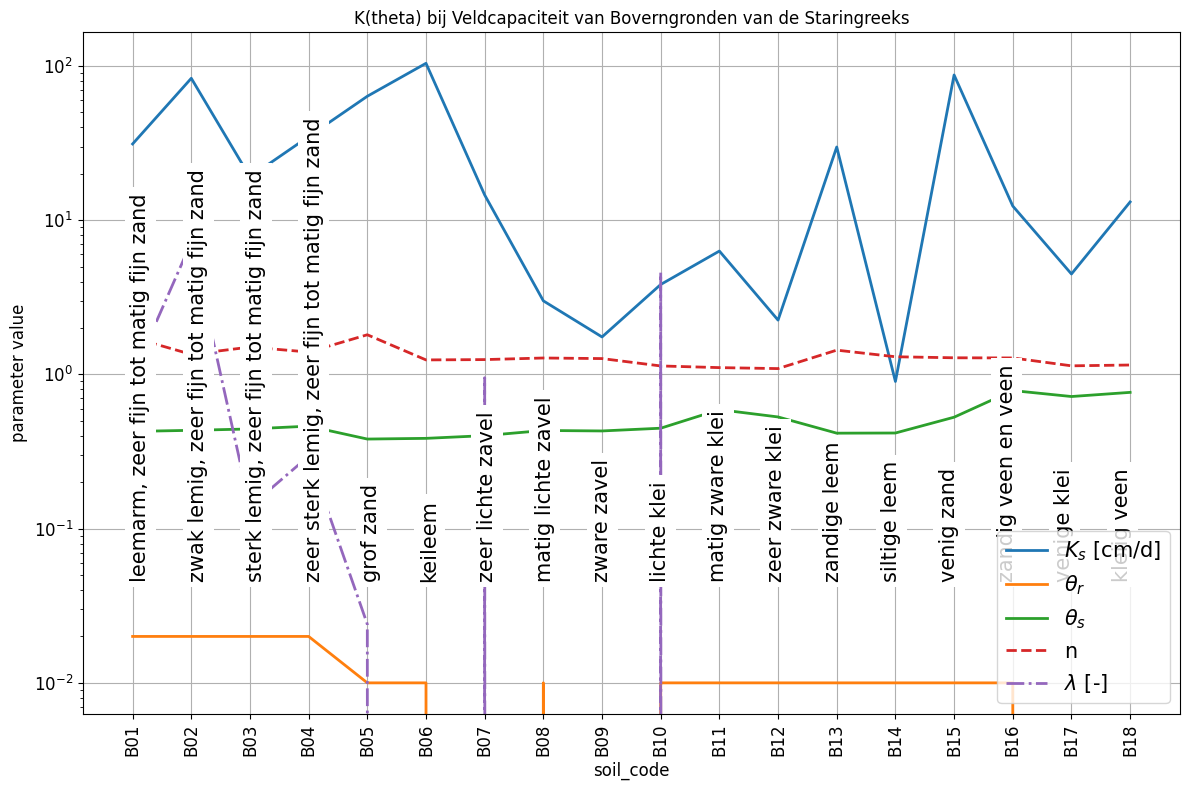

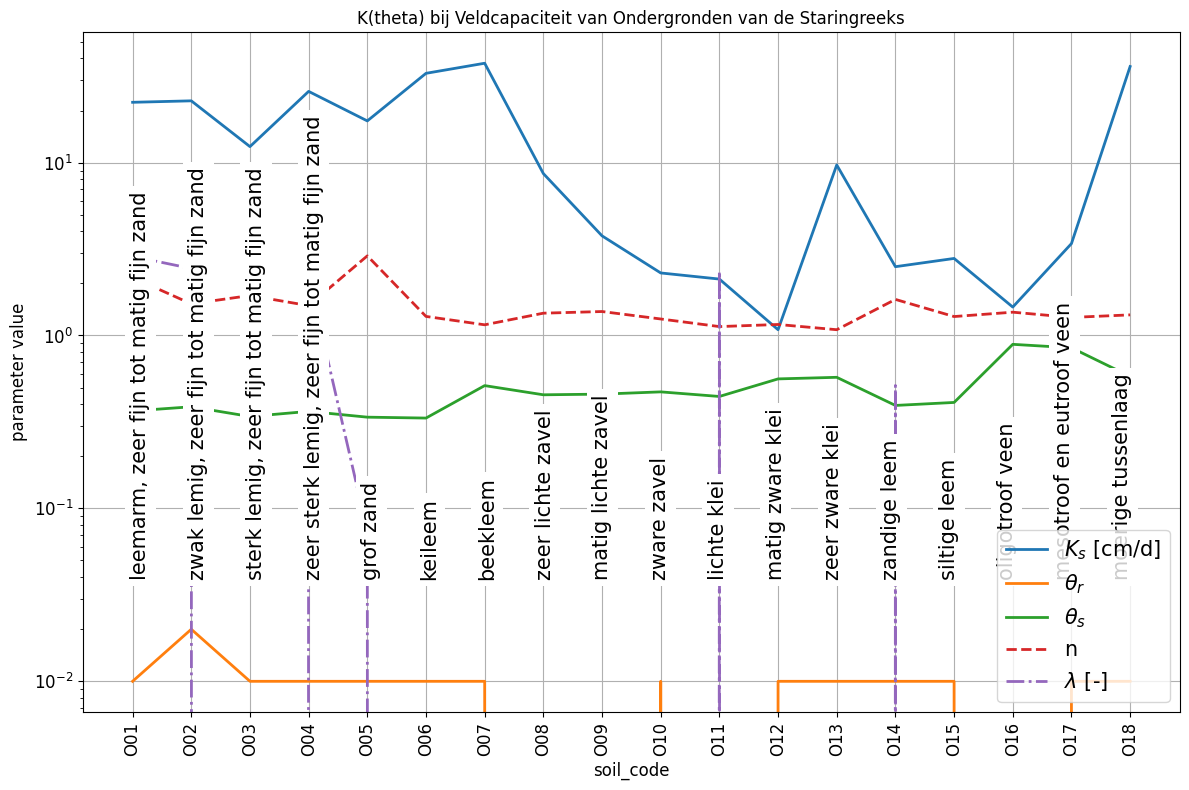

In [5]:
# %% Soil parameters
    
for BO in ['Boverngronden', 'Ondergronden']:
    title = f'K(theta) bij Veldcapaciteit van {BO} van de Staringreeks'
    ax = etc.newfig(title, 'soil_code', 'parameter value', yscale='log')

    soil_codes = [c for c in soil_data.index if c.startswith(BO[0])]

    idx = soil_codes
    ax.plot(idx, soil_data.loc[soil_codes, 'Ks'], lw=2, label=r'$K_s$ [cm/d]')
    ax.plot(idx, soil_data.loc[soil_codes, 'theta_r'], lw=2, label=r'$\theta_r$')
    ax.plot(idx, soil_data.loc[soil_codes, 'theta_s'], lw=2, label=r'$\theta_s$')        
    ax.plot(idx, soil_data.loc[soil_codes, 'n'], '--', lw=2, label='n')
    ax.plot(idx, soil_data.loc[soil_codes, 'lambda'], '-.', lw=2, label=r'$\lambda$ [-]')
    
    for i, code in enumerate(soil_codes):        

        ax.text((i + 1) / (len(soil_codes) + 1), 0.2,
                soil_data.loc[code, "Omschrijving"], ha='center', rotation=90, fontsize=15, zorder=5,
                bbox=dict(facecolor='white',
                        alpha=1,
                        edgecolor='none'),
                transform=ax.transAxes)
        
    ax.legend(fontsize=15, loc='lower right')

    #ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.xticks(rotation=90, ha="center")
    plt.tight_layout()

# Show field capacities and wilting point for all Dutch soils (Ondergronden and Bovengronden)

In [ ]:
def psi_fr_S(code, S: float | np.ndarray)-> float | np.ndarray:
    """Return psi(S)"""
    props = soil_data.loc[code]
    alpha, n, m = props['alpha'], props['n'], props['m']
    return 1 / alpha * (S ** (-1 / m) - 1) ** (1  / n)

def S_fr_psi(code, psi):
    """Return S(psi)"""
    props = soil_data.loc[code]
    alpha, n, m = props['alpha'], props['n'], props['m']        
    return (1 + (alpha * psi) ** n) ** (-m)

def theta_fr_psi(code, psi):
    props = soil_data.loc[code]
    S = S_fr_psi(code, psi)
    return props['theta_r'] + (props['theta_s'] - props['theta_r']) * S


def theta_fc(code, pF: float =2.5)-> float:
    """Return theta at field capacity (where pF = 2.0 or 2.5). (vdMolen (1973))"""
    psi_fc = 10 ** pF # cm
    return theta_fr_psi(code, psi_fc)

def theta_wp(code, pF: float =2.5)-> float:
    """Return theta at wilting point (where pF = 4.2). (vdMolen (1973))"""        
    psi_wp = 10 ** pF # cm
    return theta_fr_psi(code, psi_wp)


# K(S), K_HBW(S) and K_VGM(S)

Below the hydraulic conductivity $K(\theta)$ is defined for HBW and VGM

In [ ]:
# Van Genughten and Mualem
def K_VGM_fr_S(code, S: float | np.ndarray, S_limit: float = 1e-12)-> float | np.ndarray:
    """Return K(S)""" 
    props = soil_data.loc[code]       
    Ks, el, m = props['Ks'], props['el'], props['m']
    S = np.atleast_1d(S).clip(S_limit, 1.0)

    B = 1 - ((1 - S) ** (1/m)) ** m
    K = Ks * S ** el * B ** 2
    return K.item() if K.size == 1 else K

def K_HBW_fr_S(code, S: float | np.ndarray, S_limit: float = 1e-4)-> float | np.ndarray:
    """Return K(S) according to Heinen, Bakker and Wösten (2018)"""
    props = soil_data.loc[code]
    
    Ks = props['Ks']
    n, m, lambda_ =props['n'], props['m'], props['lambda']
    
    S = np.atleast_1d(S).clip(S_limit, 1.0)
    K = Ks * S ** (lambda_ + 2) * (S ** (-1) - (S ** (-1 / m) - 1) ** (1 - 1 / n)) ** 2
    return K.item() if K.size == 1 else K

def K_fr_S(code, S: float | np.ndarray, S_limit: float = 1e-12)-> float | np.ndarray:
    """Return K(S) according HBW or VGM"""
    
    if code.HBW is True:
        return K_HBW_fr_S(code, S, S_limit=S_limit)
    else:
        return K_VGM_fr_S(code, S, S_limit-S_limit)

# Field capacity and wilting point of the soils

In [ ]:
# %% Show field capacities and wilting points
    
for BO in ['Boverngronden', 'Ondergronden']:
    
    props = soil_data.loc[code]
    
    title = f'Veldcapaciteit en Verwelkingspunt van {BO} van de Staringreeks'
    ax = etc.newfig(title, 'soil_code', r'$\theta$')

    fcs, wps, codes = [], [], []
    for code in [c for c in soil_data.index if c.startswith(BO[0])]:
        props = soil_data.loc[code]
        codes.append(code)
        fcs.append(theta_fc(code, pF=2.5))
        wps.append(theta_wp(code, pF=4.2))
        
        i = int(code[1:])
        ax.text(int(code[1:]) - 1, 0.15,
                props['Omschrijving'], ha='center', rotation=90, fontsize=15, zorder=5,
                bbox=dict(facecolor='white',
                        alpha=1,
                        edgecolor='none'))

    ax.plot(codes, np.array(fcs), 'b', label='Veldcapaciteit')
    ax.plot(codes, np.array(wps), 'r', label='Verwelkingspunt')
    ax.legend(fontsize=15, loc='lower right')

    #ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.xticks(rotation=90, ha="center")
    plt.tight_layout()

# Show the moisture capacity $d\theta / d\psi$ for all selected soils.

In [ ]:
# %% Show dtheta/dpsi for all sands.

title = r"$\psi(\theta)$ and $\psi(\theta(\psi))$ for US soils using Van Genughten relations"
ax = etc.newfig(title, r'$\psi$', r'-d$\theta$/d$\psi$ [cm]',
                xscale='log', yscale='log')    

clrs = cycle('brgkmc')
for soil_code in soil_codes:
    props = soil_data.loc[code]
    soil_nm = props['Omschrijving']
    psi = psispace(code)
    theta = theta_fr_psi(code, psi)     
    clr = next(clrs)
    ax.plot(psi, -dtheta_dpsi(code, psi), '-', color=clr, label=fr'd$\theta$/d$\psi$   {soil_nm}')
    
    # Numeric approximation
    dtheta_dpsi = np.diff(theta) / np.diff(psi)
    psi_mid = 0.5 * (psi[1:] + psi[:-1])
    ax.plot(psi_mid, -dtheta_dpsi,'x', color=clr, label=fr'd$\theta$/d$\psi$ numerical, {soil_nm}')
    
    ax.plot(psi, -1 / dpsi_dtheta(code, theta),'.', color=clr, label=fr'1 / d$\psi$/d$\theta$ {soil_nm}')

    print(f"dpsi_dtheta * dtheta_dpsisoil_nm, {soil_nm}\n",
          dpsi_dtheta(code, theta) * dtheta_dpsi(code, psi))

ax.legend(loc='upper right')

# Check $S(\psi)$ can be computed equally well from $\psi$ as from $\theta$

Comppute $S(\psi)$ from $\psi$

$$ S\left(\psi\right)=\left(1+\left(\alpha\psi\right)^{n}\right)^{-m} $$

In [ ]:
psi   = np.logspace(0, 4.2)
theta = soil.theta_fr_psi(psi)

S_psi   = soil.S_fr_psi(psi)
S_theta = soil.S_fr_theta(theta)

title = r'Compute $S(\psi)$ and $S(\theta(\psi)), which should be on the same line'
ax = etc.newfig(title, r'$\theta$', r'$S$ (saturation)')

ax.plot(theta, S_psi,   '-', label=r'$S(\psi)$')
ax.plot(theta, S_theta, '.', label=r'$S(\theta(\psi))$')

ax.legend(loc='upper left')

title = r'Compute $S(\psi)$ and $S(\theta(\psi)), which should be on the same line'
ax = etc.newfig(title, r'$\psi$', r'$S$ (saturation)')

ax.plot(psi, S_psi,   '-', label=r'$S(\psi)$')
ax.plot(psi, S_theta, '.', label=r'$S(\theta(\psi))$')

ax.legend(loc='upper right')


title = r'Compute $S(\psi)$ and $S(\theta(\psi)), which should be on the same line'
ax = etc.newfig(title, r'$S$ (saturation)', r'pF')

pF = np.log10(psi)
ax.plot(S_psi,   pF, '-', label=r'$S(\psi)$')
ax.plot(S_theta, pF, '.', label=r'$S(\theta(\psi))$')

ax.legend(loc='upper right')

# Checking that $dS/d\psi \times d\psi/dS = 1$

There was a bug in the module. This is the test. The code computes both explicitly. After which the values are compared with the results from the module/class Soil(SoilBase(ABC))

In [ ]:
import numpy as np

# Parameters
soil = sNL.Soil('O01')
alpha, n, m = soil.props['alpha'], soil.props['n'], soil.props['m']

print(f"checking m = 1 - 1 / n:  {m == 1 - 1/n}   # Van Genuchten relation")

# Define S(psi)
def S_fr_psi(psi):
    return (1 + (alpha * psi)**n)**(-m)

# dS/dpsi
def dS_dpsi(psi):
    return -alpha * n * m * (1 + (alpha * psi)**n)**(-m-1) * (alpha * psi)**(n-1)

# psi(S)
def psi_of_S(S):
    return (S**(-1/m) - 1)**(1/n) / alpha

# dpsi/dS
def dpsi_dS(S):
    return -(1/(alpha*n*m)) * (S**(-1/m) - 1)**(1/n - 1) * S**(-1/m - 1)

# Test values
print("\nCheck the cahtGPT program\n")

psi = soil.psispace(6)  # avoid zero to prevent singularities

print("\nCompare S_fr_psi, soil.S_fr_psi\n")

S1 =      S_fr_psi(psi)    
S2 = soil.S_fr_psi(psi)

print(S1)
print(S2)

print("\nCompare dpsi_dS, soil.dpsi_dS\n")

dpdS1 =      dpsi_dS(S1)
dpdS2 = soil.dpsi_dS(S1)

print(dpdS1)
print(dpdS2)

print("\nCompare dS_dpsi, soil.dS_dpsi\n")

dSdp1 =      dS_dpsi(psi)
dSdp2 = soil.dS_dpsi(psi)

print(dSdp1)
print(dSdp2)

print("\nCompare dpsi_dS * dS_dpsi\n")
    
lhs1 =      dpsi_dS(S1) *      dS_dpsi(psi)
lhs2 = soil.dpsi_dS(S1) * soil.dS_dpsi(psi)

print(lhs1)
print(lhs2)



# $K(\theta)$ and $dK/d\theta$

Below the hydraulic conductivity $K(\theta)$ vs $\theta$ and $dK(\thetea)/d\theta$is shown for all Dutch soils.

In [ ]:
def psispace(code, S_limit=1e-6):
    props = soil_codes.loc[code]
    theta_s, theta_r = props['theta_s'], props['theta_r']
    S = np.linspace(S_limit, 1)
    
    psi = psi_fr_S(S)

In [ ]:
# %% K(theta) and dK/dtheta

for BO in ['Bovengronden', 'Ondergronden']:
    clrs = cycle('brgkmc')

    title=fr"$K$ [cm/d] versus $\theta$ voor {BO}"
    ax = etc.newfig(title, r'$\theta$', r'$K(\theta)$',
                yscale='log') #, ylim=(1e-7, 1e0))

    soil_codes = [c for c in soil_data.index if c.startswith(BO[0])]

    for i, code in enumerate(soil_codes):
        if i == 8:
            break
        clr = next(clrs)
        props = soil_data.loc[code]
        soil_nm = props['Omschrijving']
        psi = soil.psispace()
        theta = soil.theta_fr_psi(psi)
        ax.plot(theta, soil.K_fr_theta(theta), '-', color=clr, label=fr"{code}: $K(\theta)$ {soil_nm}")
        ax.plot(theta, soil.dK_dtheta(theta), '--', color=clr, label=fr"{code}: d$K$/d$\theta)$ {soil_nm}")
    ax.legend(loc='lower right')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Soil parameters (B06 Keileem)
Ks = 104.1
n = 1.242
m = 1 - 1/n  # ~0.5377
lambda_ = -1.2
alpha = 0.0209

def K_Heinen(S, Ks, n, m, lambda_):
    S = np.atleast_1d(S)
    term = (S**(-1/m) - 1)**(1 - 1/n)
    return Ks * S**(lambda_ + 2) * (S**-1 - term)**2

S = np.logspace(-4, 0)

for code in soil_data.index:
    soil = sNL.Soil(code)
    Ks, n, m, lambda_, alpha = soil.props['Ks'], soil.props['n'], soil.props['m'], soil.props['lambda'], soil.props['alpha']
    k = K_Heinen(S, Ks, n, m, lambda_)
    if not np.all(np.diff(k) > 0):
        raise ValueError(f"{code} k not monotonic")
print(k)
print(np.all(np.diff(k)) > 0)

ValueError: `x` must be strictly increasing sequence.